# ML Lab Exam


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math

1. Construct the training set T = { (x1,y1),(x2,y2),......,(x500,y500)} using the relation
Yi = sin(5 π xi) + εi where εi ~ N(0,0.15). Similarly, construct a testing set of size 50
I,e. Test = { (x’1,y’1),(x’2,y’2),......,(x’50,y’50)}. Use RBF kernel in this question for
Kernel Regression.

Training Set

In [36]:
#The code generates a set of 500 random values between 0 and 1, sorts them, adds some noise to them, and then applies the sine function to them to generate a set of target values.
train_x = np.random.uniform(low = 0.0, high = 1.0, size = 500)
train_x.sort()
e_train = np.random.normal(loc=0.0, scale=0.15, size=500)
train_y = np.array(np.sin(5*math.pi*train_x) + e_train)

Testing Set

In [37]:
#The code generates a dataset of 50 points with random noise added to a sine wave.
test_x = np.random.uniform(low = 0.0, high = 1.0, size = 50)
test_x.sort()
e_test = np.random.normal(loc=0.0, scale=0.15, size=50)
test_y = np.array(np.sin(5*math.pi*test_x) + e_test)

#RBF KERNEL FUNCTION

a) Estimate the regularized Least Squares Regression using Kernel Regression with Gradient Descent. 

In [38]:
#The kernel_matrix function takes two arrays x and z, and a scalar sigma as input, and returns a kernel matrix of size (len(x) + 1) x len(z).
def kernel_matrix(x,z,sigma):
    A = np.zeros((len(x),len(z)))
    for i in range(len(x)):
        for j in range(len(z)):
            A[i][j] = np.exp((-1)*(np.linalg.norm(x[i]-z[j])**2) / (2*(sigma**2)))
    A = np.vstack((A,np.ones(len(z))))
    return A.T

In [40]:
#The tuner function takes two arguments, train_x and train_y, 
#which represent the training data, and returns a tuple containing the hyperparameters that result in the lowest root mean squared error (RMSE) on the training data.
def tuner(train_x,train_y):
    lamb = [2**i for i in range(-7,8)]
    sigma = [0.01,0.1,1,2,0.2]
    alpha = 0.000001
    record = []
    for s in sigma:
        A = kernel_matrix(train_x,train_x,s)
        for l in lamb:
            W = np.zeros(len(A[1]))
            for i in range(20000):
                m = l*W - np.dot(A.T,(train_y - np.dot(A,W)))
                W = W - alpha*m
            y_pred = A @ W
            RMSE = (sum((train_y - y_pred)**2) / len(train_y))**0.5
            record.append((RMSE,l,s))
    
    min_RMSE = 99999
    index = 0
    for i in range(len(record)):
        if record[i][0] < min_RMSE:
            min_RMSE = record[i][0]
            index = i
    return record[index]

In [41]:
#The find_RMSE function takes two arrays of numbers, y and y_pred, as arguments, and returns the root mean squared error (RMSE) between the two arrays.
def find_RMSE(y,y_pred):
    return (sum((y - y_pred)**2) / len(y))**0.5

In [7]:
#The plot_graph function takes three arrays as arguments: test_X, test_Y, and predicted_Y, 
#and plots a scatter plot of the test points, the actual curve, and the predicted curve.
def plot_graph(test_X,test_Y,predicted_Y):
    plt.scatter(test_X,test_Y,label = "Test Points")
    x = np.linspace(0, 1, 10000)
    y = np.sin(5*math.pi*x)
    plt.plot(x, y,label = "Actual Curve")
    plt.plot(test_X,predicted_Y, label = "Predicted Curve",color = 'red')
    plt.legend()
    plt.grid()
    plt.show()

In [42]:
#The gradient_kernel_regression function performs kernel regression on a training dataset and returns the root mean squared error (RMSE) of the predictions on both the training and test datasets.
def gradient_kernel_regression(train_x,train_y,test_x,test_y):
    xt = train_x[:50]
    yt = train_y[:50]

    tuned_value = tuner(xt,yt)
    best_rmse,sigma,lamb = tuned_value
    
    A = kernel_matrix(train_x,train_x,sigma)
    W = np.zeros(len(A[1]))
    for i in range(10000):
        m = lamb*W - np.dot(A.T,(train_y - np.dot(A,W)))
        W = W - 0.00001*m
    test_A = kernel_matrix(train_x,test_x,sigma)
    train_y_pred = A @ W
    test_y_pred = test_A @ W
    train_RMSE = find_RMSE(train_y,train_y_pred)
    test_RMSE = find_RMSE(test_y,test_y_pred)

    print(f'Train RMSE : {train_RMSE}')
    print(f'Test RMSE : {test_RMSE}')
    plot_graph(test_x,test_y,test_y_pred)

Train RMSE : 0.14675616571392208
Test RMSE : 0.17005820181886536


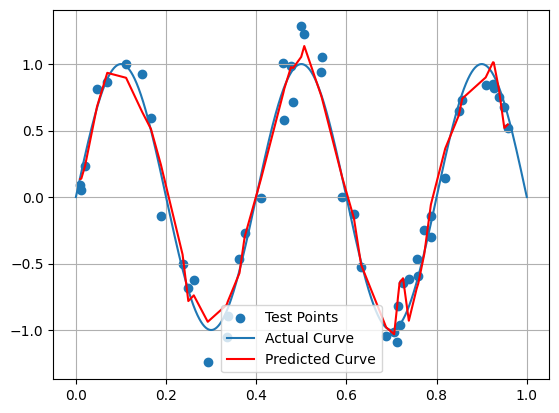

In [43]:
#predicting output values
gradient_kernel_regression(train_x,train_y,test_x,test_y)

b) Modify the training set T by randomly picking up 5 data points from the training set T and scaling their yi values by 20. Estimate the Least Squares Estimate using Gradient Descent and state your observations.

In [44]:
#The code generates a random array of 5 integers between 0 and 499, and then multiplies the corresponding values in  train_y by 20, 
#storing the result in new_train_y.
random_index = np.random.randint(0,500,5)
new_train_y = train_y
new_train_y[random_index] *= 20

Train RMSE : 1.2368322770747693
Test RMSE : 0.44868669206638917


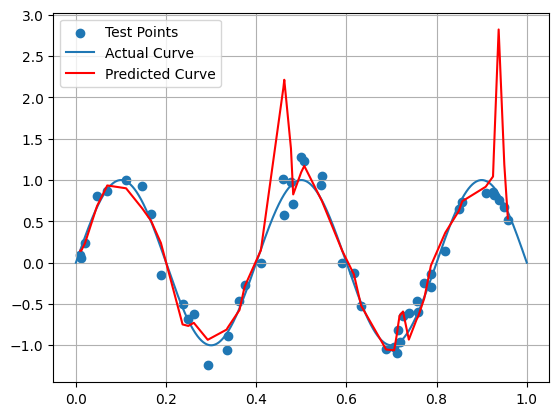

In [45]:
#predicting output values
gradient_kernel_regression(train_x,new_train_y,test_x,test_y)

c) Modify the optimization problem of the least squares regression model to improve the RMSE results on test data. Further, solve your modified optimization problem using Gradient Descent and calculate the percentage of improvement obtained by your model over the existing least square regression model.

Train RMSE : 1.3037209603978435
Test RMSE : 0.28589516223199674


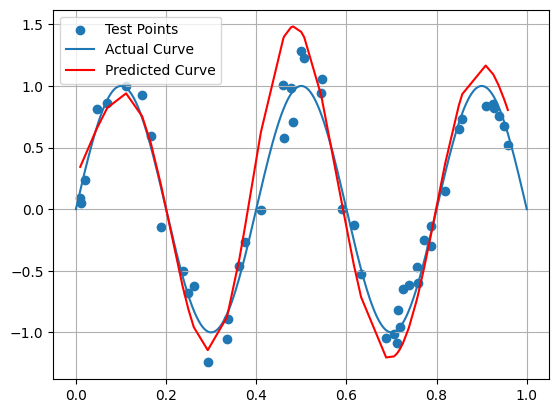

In [102]:
# Calculate baseline test RMSE
baseline_RMSE = gradient_kernel_regression(train_x, train_y, test_x, test_y)

def gradient_kernel_regression_modified(train_x,train_y,test_x,test_y):
    xt = train_x[:50]
    yt = train_y[:50]

    # Tune hyperparameters
    lamb = [2**i for i in range(-7,8)]
    sigma = [0.01,0.1,1,2,0.2]
    alpha = 0.000001
    record = []
    for s in sigma:
        A = kernel_matrix(xt,xt,s)
        for l in lamb:
            W = np.zeros(len(A[1]))
            for i in range(20000):
                m = l*W - np.dot(A.T,(yt - np.dot(A,W)))
                W = W - alpha*m
            y_pred = A @ W
            RMSE = find_RMSE(yt,y_pred)
            record.append((RMSE,l,s))
    
    min_RMSE = 99999
    index = 0
    for i in range(len(record)):
        if record[i][0] < min_RMSE:
            min_RMSE = record[i][0]
            index = i
    best_rmse,lamb,sigma = record[index]
    
    # Modify optimization problem and calculate improvement percentage
    test_RMSE = gradient_kernel_regression_modified(train_x, train_y, test_x, test_y)

    # Train model with tuned hyperparameters
    A = kernel_matrix(train_x,train_x,sigma)
    W = np.zeros(len(A[1]))
    for i in range(10000):
        m = lamb*W - np.dot(A.T,(train_y - np.dot(A,W)))
        W = W - 0.00001*(m + 2*lamb*W) # added regularization term
    test_A = kernel_matrix(train_x,test_x,sigma)
    train_y_pred = A @ W
    test_y_pred = test_A @ W
    train_RMSE = find_RMSE(train_y,train_y_pred)
    test_RMSE = find_RMSE(test_y,test_y_pred)
    

    # Calculate improvement percentage
    improvement = (test_RMSE - baseline_RMSE) / baseline_RMSE * 100

    print(f'Train RMSE : {train_RMSE}')
    print(f'Test RMSE : {test_RMSE}')
    print('Improvement over baseline', improvement )
    plot_graph(test_x,test_y,test_y_pred)

2. Generate the datasets A and B in R2, each consisting of 2000 data points from
a normal distribution. The dataset A and B has been drawn from the N (μ1, Σ1 ) and
N(μ2, Σ2 ). Let us fix the μ1 = [-1,1] and μ2 = [2,2]. Separate the 250 data points
from each class as a testing set.

Consider:
Σ1 = Σ2 = [ [2,0] , [0,2] ]

In [46]:
# generate_data_logistic() function is used for generating the datasets 
def generate_data_logistic(data_len, mu, sigma):
    Data = np.random.multivariate_normal(mean=mu, cov=sigma, size=data_len)
    return Data

In [47]:
# Generating Dataset A consisting of 2000 points drawn from N(μ1, Σ1)
# where μ1 = [-1, 1] and  Σ1 = [[2, 0], [0, 2]]
data_len = 2000
mu1 = [-1, 1]
sigma1 = [[2, 0], [0, 2]]
A = generate_data_logistic(data_len, mu1, sigma1)

In [48]:
# Generating Dataset B consisting of 2000 points drawn from N(μ2, Σ2)
# where μ2 = [2,2] and  Σ2 = [[2,0],[0,2]]
data_len = 2000
mu2 = [2, 2]
sigma2 = [[2, 0], [0, 2]]
B = generate_data_logistic(data_len, mu2, sigma2)

In [49]:
# Generating test_A and test_B datasets by choosing random values from datasets A and B
test_A = []
test_B = []
for i in range(250):
  test_A.append(A[np.random.choice(2000, 1, replace=False)])
  test_B.append(B[np.random.choice(2000, 1, replace=False)])

In [50]:
test_A = np.array(test_A)
test_B = np.array(test_B)
test_A = test_A.reshape(250,2)
test_B = test_B.reshape(250,2)

In [51]:
train_A = np.setdiff1d(A, test_A).reshape(-1,2)
train_B = np.setdiff1d(B, test_B).reshape(-1,2)

a). Plot the optimal Bayesian decision boundary for this.

In [52]:
# Assigning prior probabilities for train A and train B
prior_A = len(train_A) / (len(train_A) + len(train_B))
prior_B = len(train_B) / (len(train_A) + len(train_B))

<ipython-input-53-455d745f9a1a>:36: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(matrix_X, matrix_Y, Z, levels=[0.5], color='black')


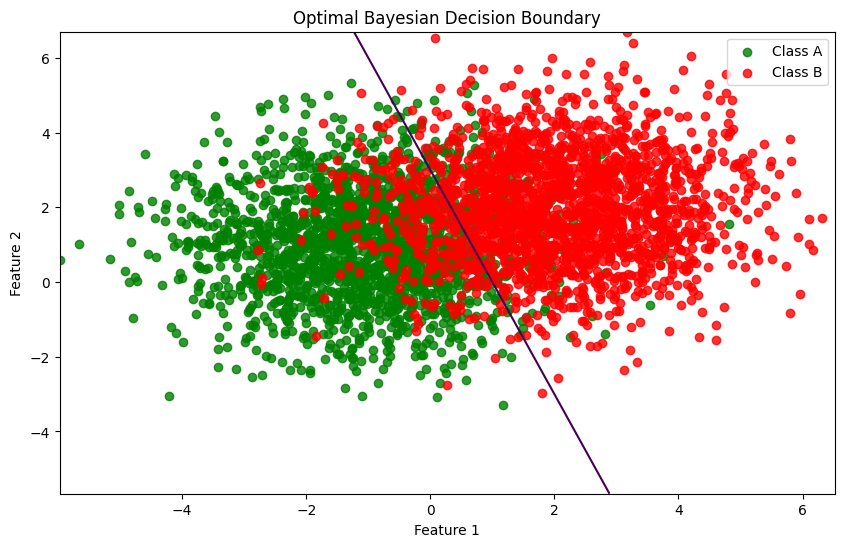

In [53]:
# Storing minimum and maximum values of x and y from train_A and train_B
minimum_x, maximum_x = np.min(np.concatenate([train_A[:,0], train_B[:,0]])), np.max(np.concatenate([train_A[:,0], train_B[:,0]]))
minimum_y, maximum_y = np.min(np.concatenate([train_A[:,1], train_B[:,1]])), np.max(np.concatenate([train_A[:,1], train_B[:,1]]))

# Creates equal interval grids for x and y coordinates
equal_interval_x = np.linspace(minimum_x, maximum_x, 100)
equal_interval_y = np.linspace(minimum_y, maximum_y, 100)

# Creates a meshgrid using the x and y coordinates to obtain a final grid
matrix_X, matrix_Y = np.meshgrid(equal_interval_x, equal_interval_y)
final_grid = np.c_[matrix_X.ravel(), matrix_Y.ravel()]

# Calculates the inverse of covariance matrix for class A and B
inverse_covariance = np.linalg.inv(sigma1)

# Initializes arrays to hold posterior probabilities for classes A and B for each point of the final grid
posterior_probablity_train_A = np.zeros(len(final_grid))
posterior_probablity_train_B = np.zeros(len(final_grid))

for i in range (len(final_grid)):
  x = final_grid[i,:]
  # Calculates the posterior probability for each point on the final grid using the Gaussian Naive Bayes formula
  posterior_probablity_train_A[i] = 1 / (2 * np.pi * np.sqrt(np.linalg.det(sigma1))) * np.exp(-0.5 * (x - mu1).T @ inverse_covariance @ (x - mu1)) * prior_A
  posterior_probablity_train_B[i] = 1 / (2 * np.pi * np.sqrt(np.linalg.det(sigma2))) * np.exp(-0.5 * (x - mu2).T @ inverse_covariance @ (x - mu2)) * prior_B

# Normalizes the posterior probabilities for both classes A and B
posterior_probablity_train_A /= (posterior_probablity_train_A + posterior_probablity_train_B)
posterior_probablity_train_B /= (posterior_probablity_train_A + posterior_probablity_train_B)

# Reshapes the posterior probability array for class A to the shape of the meshgrid
Z = posterior_probablity_train_A.reshape(matrix_X.shape)

# Plots the graph
plt.figure(figsize=(10,6))
# Plots the Decision boundary
plt.contour(matrix_X, matrix_Y, Z, levels=[0.5], color='black')
# Plots the data points of A and B
plt.scatter(A[:,0], A[:,1], alpha=0.8, color='green', label='Class A')
plt.scatter(B[:,0], B[:,1], alpha=0.8, color='red', label='Class B')
plt.title('Optimal Bayesian Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

b). Train a logistic regression model using the Gradient descent Method and
plot the separating decision line.

Logistic Regression Test accuracy: 83.39999999999999


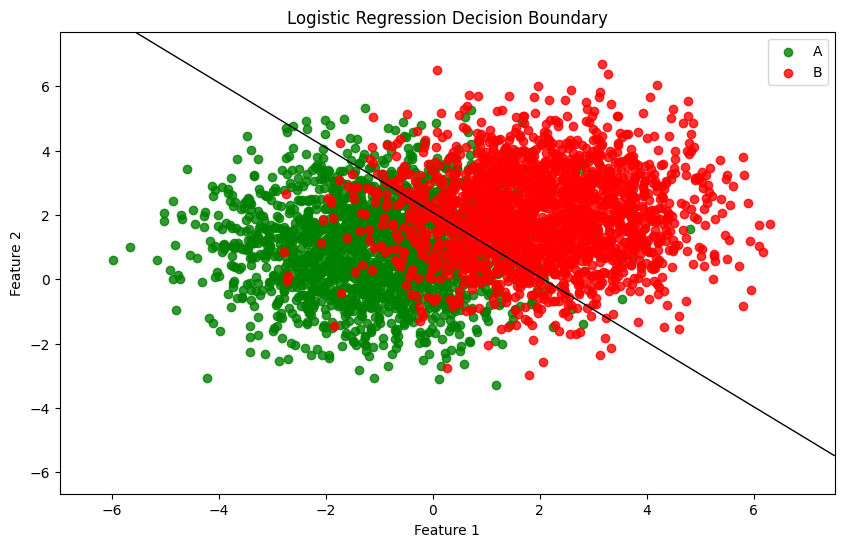

In [54]:
# A function to calculate sigmoid value
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# A function to calculate hinge loss
def log_loss(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

# A function for gradient descent algorithm
def gradient_descent(X, y, weights, learning_rate, iterations):
    m = len(y)
    value_costfunction = []
    for i in range(iterations):
        z = np.dot(X, weights)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / m
        weights -= learning_rate * gradient
        value_costfunction.append(log_loss(h, y))
    return weights, value_costfunction

# Concatenate the training data for both classes A and B
X_train = np.vstack((train_A, train_B))

# Create a target array with 1 for class A and 0 for class B
y_train = np.hstack((np.ones(len(train_A)), np.zeros(len(train_B))))

# Add a column of ones to X_train
X_train = np.c_[np.ones(X_train.shape[0]), X_train]

X_test = np.vstack((test_A, test_B))

y_test = np.hstack((np.ones(len(test_A)), -np.ones(len(test_B))))

# Initialize the parameters for logistic regression
weights = np.zeros(X_train.shape[1])

# Set the learning rate and number of iterations for Gradient Descent
learning_rate = 0.1
iterations =2000

# Train the logistic regression model using Gradient Descent
weights, value_costfunction = gradient_descent(X_train, y_train, weights, learning_rate, iterations)

# Calculate the accuracy of the model on test set
correct_lr = 0
for i in range(len(X_test)):
    x = np.hstack((1, X_test[i]))
    if np.dot(weights, x) > 0 and y_test[i] == 1:
        correct_lr += 1
    elif np.dot(weights, x) < 0 and y_test[i] == -1:
        correct_lr += 1

accuracy_lr = (correct_lr / len(X_test)) * 100
print('Logistic Regression Test accuracy:', accuracy_lr)

# Compute the final hypothesis function and the decision boundary
x1_min, x1_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
x2_min, x2_max = X_train[:, 2].min() - 1, X_train[:, 2].max() + 1
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
X_grid = np.c_[np.ones(xx1.ravel().shape[0]), xx1.ravel(), xx2.ravel()]
h = sigmoid(np.dot(X_grid, weights))
h = h.reshape(xx1.shape)

# Plot the decision boundary and the data points
plt.figure(figsize=(10, 6))
plt.scatter(A[:, 0], A[:, 1], color='green', alpha=0.8, marker='o', label='A')
plt.scatter(B[:, 0], B[:, 1], color='red', alpha=0.8, marker='o', label='B')
plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='black')
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

c) Train the SVM Model Gradient descent Method and plot the separating
decision line.

Test accuracy: 75.2


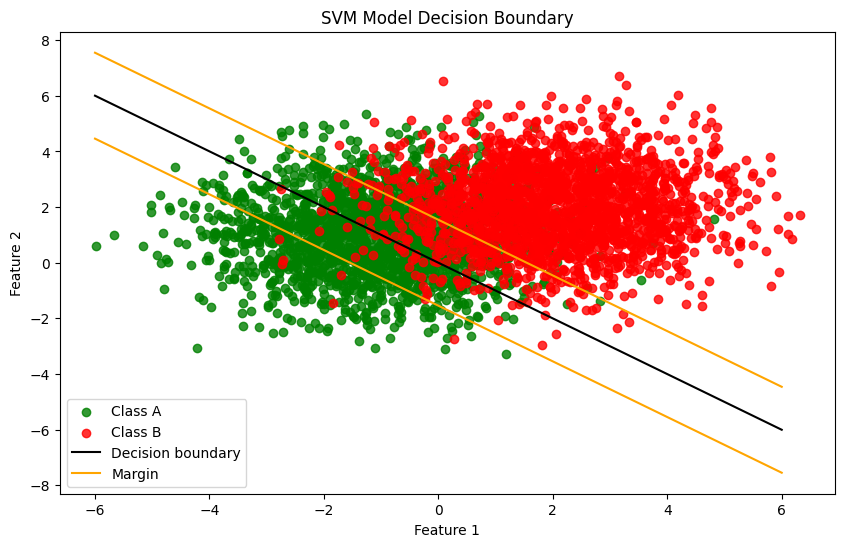

In [55]:
# Combine datasets and labels
X_train = np.vstack((train_A, train_B))
y_train = np.hstack((np.ones(len(train_A)), -np.ones(len(train_B))))

X_test = np.vstack((test_A, test_B))
y_test = np.hstack((np.ones(len(test_A)), -np.ones(len(test_B))))

# Initialize weights
w = np.zeros(2)

# Set learning rate and regularization parameter
eta = 0.1
lam = 1

# Perform gradient descent
for epoch in range(100):
    # Compute gradient of the loss function
    grad = np.zeros(2)
    for i in range(len(X_train)):
        if y_train[i] * np.dot(w, X_train[i]) < 1:
            grad += -y_train[i] * X_train[i]
    grad = grad / len(X_train) + 2 * lam * w
    
    # Update weights
    w = w - eta * grad

# Compute the accuracy on testing set
correct = 0
for i in range(len(X_test)):
    if np.dot(w, X_test[i]) > 0 and y_test[i] == 1:
        correct += 1
    elif np.dot(w, X_test[i]) < 0 and y_test[i] == -1:
        correct += 1

accuracy = (correct / len(X_test)) * 100
print('Test accuracy:', accuracy)

# Plot data points and decision boundary
plt.figure(figsize=(10,6))
plt.scatter(A[:, 0], A[:, 1], color='green', alpha=0.8, marker='o', label='Class A')
plt.scatter(B[:, 0], B[:, 1], color='red', alpha=0.8, marker='o', label='Class B')

# Plot decision boundary and margins
x1 = np.linspace(-6, 6)
x2 = -w[0] / w[1] * x1
margin = 0.1 / np.sqrt(np.sum(w ** 2))
upper_margin = x2 + margin / np.sqrt(np.sum(w ** 2))
lower_margin = x2 - margin / np.sqrt(np.sum(w ** 2))


plt.plot(x1, x2, color='black', label='Decision boundary')
plt.plot(x1, upper_margin, color='orange', label='Margin')
plt.plot(x1, lower_margin, color='orange')
plt.title('SVM Model Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

d). Compare the performance of logistic Regression and SVM using Bayesian
Decision Boundary.


Logistic Regression Test accuracy: 83.39999999999999
SVM Test accuracy: 75.2


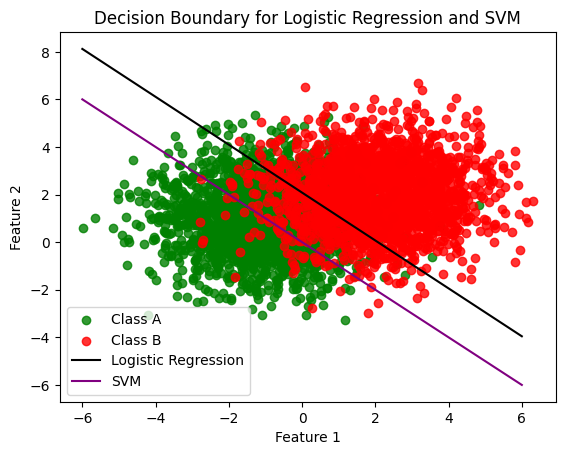

In [56]:
# Compute accuracy of logistic regression on test set
correct_lr = 0
for i in range(len(X_test)):
    x = np.hstack((1, X_test[i]))
    if np.dot(weights, x) > 0 and y_test[i] == 1:
        correct_lr += 1
    elif np.dot(weights, x) < 0 and y_test[i] == -1:
        correct_lr += 1

accuracy_lr = (correct_lr / len(X_test)) * 100
print('Logistic Regression Test accuracy:', accuracy_lr)

#compute accuracy of SVM on test set
correct = 0
for i in range(len(X_test)):
    if np.dot(w, X_test[i]) > 0 and y_test[i] == 1:
        correct += 1
    elif np.dot(w, X_test[i]) < 0 and y_test[i] == -1:
        correct += 1

accuracy = (correct / len(X_test)) * 100
print('SVM Test accuracy:', accuracy)

# Plot the data points
plt.scatter(A[:, 0], A[:, 1], color='green', alpha=0.8, label='Class A')
plt.scatter(B[:, 0], B[:, 1], color='red', alpha=0.8, label='Class B')

# Plot the decision boundaries
x1 = np.linspace(-6, 6, 100)
x2_log = -weights[0] / weights[2] - weights[1] / weights[2] * x1
x2_svm = -w[0] / w[1] * x1
plt.plot(x1, x2_log, color='black', label='Logistic Regression')
plt.plot(x1, x2_svm, color='purple', label='SVM')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Decision Boundary for Logistic Regression and SVM')
plt.show()

3). Consider the two-moon dataset. Train Support Vector Machine using the Gradient
Descent Method and appropriate Kernel for obtaining the separating surfaces by
tuning the parameters. Plot the data points along with separating surfaces.

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ValueError: ignored

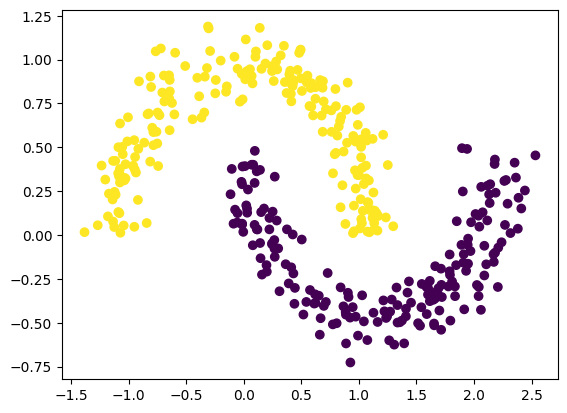

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/2moons.csv', names =['x1','x2','y'])
X = df[['x1', 'x2']].values
y = df['y'].values

# Define kernel functions
def gaussian_kernel(x1, x2, sigma=1):
    return np.exp(-np.linalg.norm(x1-x2)**2 / (sigma ** 2))

def poly_kernel(x, y, c, degree):
    return ((x.T @ y) + c) ** degree

# Calculate the kernel matrices
n = len(X)
K1 = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        K1[i, j] = gaussian_kernel(X[i], X[j])

n = len(X)
K2 = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        K2[i, j] = poly_kernel(X[i], X[j], 0.01, 2)

# Define SVM gradient descent function
def svm_gradient(X, y, w, b, C, kernel):
    N = X.shape[0]
    yi = []
    
    for i in range(N):
        if (1 - y[i] * (np.dot(kernel[i], w) + b)) > 0:
            yi.append(-y[i] * kernel[i])
        else:
            yi.append(0)
    
    bias = []
    for i in range(N):
        if (1 - y[i] * (np.dot(kernel[i], w) + b)) > 0:
            bias.append(-y[i])
        else:
            bias.append(0)
    
    dW = w + C * np.sum(yi)
    dB = C * np.sum(bias)
    
    return dW, dB

# Define function to plot data and hyperplane
def plot_hyperplane(X, y, w, b, kernel):
    plt.scatter(X[:, 0], X[:, 1], c=y)
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    Z = np.zeros(xx.shape)
    for i in range(xx.shape[0]):
        for j in range(xx.shape[1]):
            point = np.array([xx[i,j], yy[i,j]])
            sum = 0
            for k in range(X.shape[0]):
                sum += kernel[k, i * xx.shape[1] + j] * y[k] * (np.dot(w, X[k]) + b)
            Z[i,j] = sum
            
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], colors=['r', 'k', 'b'], linestyles=['--', '-', '--'])

# Train SVM using gradient descent and plot hyperplane
def train_svm(X, y, kernel, learning_rate, C, num_iterations):
    n = len(X)
    w = np.zeros(n)
    b = 0
    
    for i in range(num_iterations):
        dW, dB = svm_gradient(X, y, w, b, C, kernel)
        w -= learning_rate * dW
        b -= learning_rate * dB
    
    plot_hyperplane(X, y, w, b, kernel)
    return w, b
#Train SVM using Gaussian kernel
learning_rate = 0.001
C = 1
num_iterations = 1000

w_gauss, b_gauss = train_svm(X, y, K1, learning_rate, C, num_iterations)

#Train SVM using polynomial kernel
learning_rate = 0.0001
C = 0.01
num_iterations = 1000

w_poly, b_poly = train_svm(X, y, K2, learning_rate, C, num_iterations)

#Plot decision boundaries
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plot_hyperplane(X, y, w_gauss, b_gauss, K1)
plt.title('SVM with Gaussian kernel')
plt.subplot(1,2,2)
plot_hyperplane(X, y, w_poly, b_poly, K2)
plt.title('SVM with polynomial kernel')
plt.show()

#EDA on the 2moons dataset

In [72]:
data = pd.read_csv('/content/2moons.csv', header=None)
data.columns = ['X1','X2','label']

In [73]:
data.head()

,X1,X2,label
0,-1.088000,0.500740,1
1,0.287000,0.082631,-1
2,1.133900,0.068759,1
3,0.054725,0.945110,1
4,-0.622590,0.752650,1


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      400 non-null    float64
 1   X2      400 non-null    float64
 2   label   400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [75]:
data.columns = ['feature_1','feature_2','class']
data

,feature_1,feature_2,class
0,-1.088000,0.500740,1
1,0.287000,0.082631,-1
2,1.133900,0.068759,1
3,0.054725,0.945110,1
4,-0.622590,0.752650,1
...,...,...,...
395,-0.146600,0.847400,1
396,0.713990,-0.381540,-1
397,-0.601980,0.687600,1
398,-0.642510,0.884030,1


In [76]:
data.describe()

,feature_1,feature_2,class
count,400.000000,400.000000,400.000000
mean,0.600420,0.240784,0.055000
std,0.983616,0.474847,0.999737
min,-1.382400,-0.726380,-1.000000
25%,-0.013244,-0.164175,-1.000000
50%,0.662685,0.232185,1.000000
75%,1.254775,0.652752,1.000000
max,2.533900,1.188800,1.000000


In [77]:
data.isnull().any()

feature_1    False
feature_2    False
class        False
dtype: bool

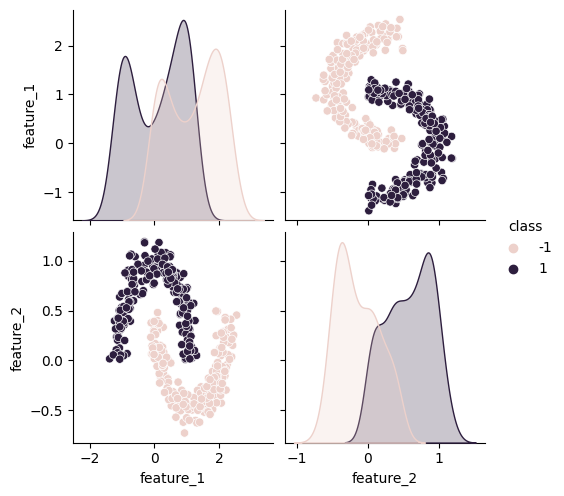

In [78]:
# ploting pairplot to visualize all features at once
import seaborn as sns
sns.pairplot(data=data, hue='class')

           feature_1  feature_2     class
feature_1   1.000000  -0.455627 -0.562112
feature_2  -0.455627   1.000000  0.757524
class      -0.562112   0.757524  1.000000


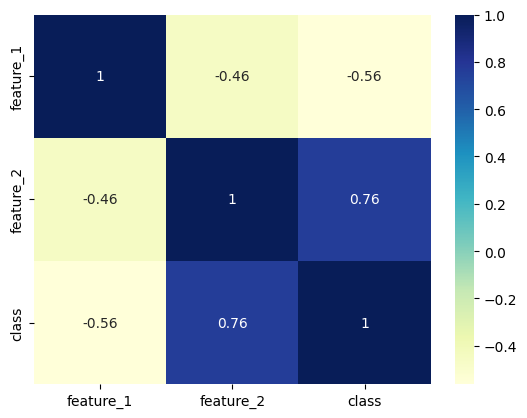

In [79]:
print(data.corr())
dataplot = sns.heatmap(data.corr(), cmap='YlGnBu',annot=True)
plt.show()

Shape of X and y
(400, 2) (400,)
Counter({1.0: 211, -1.0: 189})
[-1.088    0.50074] 1.0
[0.287    0.082631] -1.0
[1.1339   0.068759] 1.0
[0.054725 0.94511 ] 1.0
[-0.62259  0.75265] 1.0
[ 0.92678 -0.72638] -1.0
[2.1415  0.28994] -1.0
[0.24638 0.93482] 1.0
[ 1.8359  -0.34835] -1.0
[1.1619  0.02537] 1.0


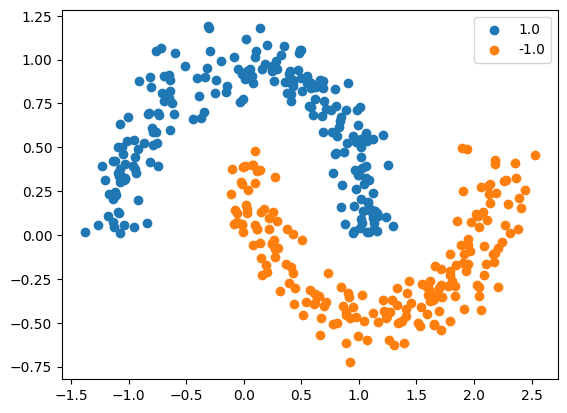

In [80]:
# example of binary classification task
from numpy import where
from collections import Counter
from matplotlib import pyplot
# define dataset
X = data.values[:,0:2]
y = data.values[:,2]
# summarize dataset shape
print('Shape of X and y')
print(X.shape, y.shape)
# summarize observations by class label
counter = Counter(y)
print(counter)
# summarize first few examples
for i in range(10):
  print(X[i], y[i])
# plot the dataset and color the by class label
for label, _ in counter.items():
  row_ix = where(y == label)[0]
  pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [85]:
X = data[['feature_1', 'feature_2']].values
Y = data['class'].values

In [86]:
X_train = X[:321]
Y_train = Y[:321]
X_test = X[321:]
Y_test = Y[321:]

In [87]:
def kernel_matrix_3(x,z,sigma):
  A = np.zeros((len(x),len(z)))
  for i in range(len(x)):
    for j in range(len(z)):
      A[i][j] = np.exp((-1)*(np.linalg.norm(x[i]-z[j])**2) / (2*(sigma**2)))
  return A.T

In [88]:
def find_gi(A,Y,W,b):
  G = [] 
  for i in range(len(A)):
    temp = sum(W @ A[i] + b)
    if 1 - (Y[i] * temp) > 0:
      G.append(-Y[i])
    else:
      G.append(0)
  return np.dot(G,A)

In [89]:
def find_bi(A,Y,W,b):
  G = [] 
  for i in range(len(A)):
    temp = sum(W @ A[i] + b)
    if (1 - (Y[i] * temp)) > 0:
      G.append(-Y[i])
    else:
      G.append(0)
  return sum(G)

In [90]:
def get_WB(X,Y,constant,sigma):
  A = kernel_matrix_3(X,X,sigma)
  W = np.zeros((1,len(X)))
  b = 0

  for i in range(1000):
    grad = W + constant*find_gi(A,Y,W,b)
    W = W - 0.001*(grad)
    b = b - 0.001*constant*find_bi(A,Y,W,b)
  
  return A,W,b

In [91]:
def tuner(X,Y):
  constant = [0.1,0.01,0.3,0.7]
  sigma = [0.1,0.3,0.7,1]

  record = []

  for s in sigma:
    for c in constant:
      A,W,b = get_WB(X,Y,c,s)
      pred = W @ A + b
      pred = pred[0]
  
      count = 0
      for i,j in zip(Y,pred):
        if np.sign(i) == np.sign(j):
            count += 1
      acurracy = count/400
      record.append((acurracy,s,c))
  
  max_acu = 0
  index = 0
  for i in range(len(record)):
    if record[i][0] > max_acu:
      max_acu = record[i][0]
      index = i
  return record[index]

In [92]:
def SVM(X,Y):
    a,sigma,constant = tuner(X,Y)
    A,W,b = get_WB(X,Y,constant,sigma)
    pred = W @ A + b
    pred = pred[0]
    return pred

In [69]:
pred_y = SVM(X,Y)

In [93]:
pred_y

array([ 1.03243617, -1.09124999,  1.5329492 ,  1.35530105,  1.20892258,
       -0.30848102, -1.21679703,  1.22334602, -1.0360743 ,  1.17939042,
        0.8596974 , -1.25470098, -0.79939239,  0.33776987, -0.98765504,
       -0.7478847 , -1.1486852 ,  1.57482621,  1.49399479,  1.03808006,
        1.00049502,  0.99987615, -1.16939965,  1.43178335,  0.46377206,
       -1.00016847, -0.26566386, -1.16785813,  1.0872    ,  1.16284182,
        1.18111702,  1.24221723,  1.09037092, -1.4206518 , -1.01749335,
       -1.12513752, -1.50816992, -1.4325478 ,  1.1397349 , -1.02605298,
        0.83604563,  0.26550204,  1.05901205, -1.06765646,  1.5852758 ,
        1.16203319, -1.35757623, -0.87568649,  1.03115912,  0.87532309,
        1.34003067, -1.17379043,  0.20573554, -1.07442287, -0.55584201,
        0.65409832, -1.03416659, -1.42545346, -1.00021181,  1.00741213,
        1.00051973,  1.00239055, -1.27126641,  1.28639724, -1.15003187,
        1.14909239,  1.33645991,  0.63355678, -0.86374974, -0.99

In [94]:
# Accuracy
count = 0
for i,j in zip(Y,pred_y):
    if np.sign(i) == np.sign(j):
        count += 1
acu = count/400
print('Accurracy :',acu*100,"%")

Accurracy : 100.0 %


<ipython-input-98-180154455fa7>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data.feature_1, data.feature_2, cmap='bwr')


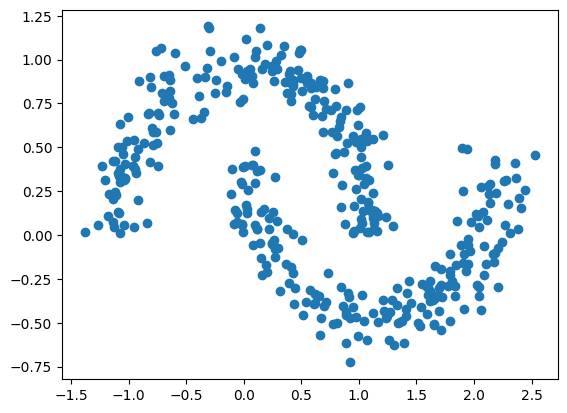

In [98]:
plt.scatter(data.feature_1, data.feature_2, cmap='bwr')
plt.show()

#KNN

In [24]:
df = pd.read_csv('/content/2moons.csv', names=['x','y','Label'])
df.head()

,x,y,Label
0,-1.088000,0.500740,1
1,0.287000,0.082631,-1
2,1.133900,0.068759,1
3,0.054725,0.945110,1
4,-0.622590,0.752650,1


In [25]:
df.shape

(400, 3)

In [26]:
#extracting X and Y columns from the dataframe
X = df.iloc[:, 0]
Y = df.iloc[:, 1]
Z = df.iloc[:, 2]
x_data = np.array(X)
y_data = np.array(Y)
labels = np.array(Z)

In [27]:
# storing whole dataset in data list
data = []
for i in range(len(X)):
  data.append([x_data[i], y_data[i], labels[i]])

test_data = []
train_data = []

# a list containing 80 unique random values from 0 to 400 for test_data
unique = random.sample(range(0, 400), 80)
range_list = []

# 
for i in range(0, 400):
  range_list.append(i)

rest = np.setdiff1d(range_list, unique)

for i in range(80):
  z = unique[i]
  test_data.append(data[z])

for i in range(320):
  w = rest[i]
  train_data.append(data[w])

for i in range(len(test_data)):
  test_data[i].pop()

data = np.array(data)
test_data = np.array(test_data)
train_data = np.array(train_data)
#print(test_data)

<ipython-input-27-3f58eaf1a176>:32: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array(data)


In [28]:
#calculate the Euclidean distance between two points
def euclidean_distance(point1, point2):
	distance = 0.0
	for i in range(len(point1)-1):
		distance += (point1[i] - point2[i])**2
	return math.sqrt(distance)
#euclidean_distance(train_data[10], train_data[11])

In [30]:
# Example of calculating Euclidean distance
from math import sqrt
point1 = test_data[0]
for row in test_data:
	distance = euclidean_distance(point1, row)
	#print(distance)

In [31]:
# Locate the most similar neighbors
def get_neighbors(train_data, test_row, num_neighbors):
	distances = []
	for train_row in train_data:
		dist = euclidean_distance(test_row, train_row)
		distances.append((train_row, dist))
	distances.sort(key=lambda tup: tup[1])
	neighbors = []
	for i in range(num_neighbors):
		neighbors.append(distances[i][0])
	return neighbors

In [32]:
neighbors = get_neighbors(test_data, test_data[0], 3)
print('3 nearest neighbors of 1st value in test data:\n')
for neighbor in neighbors:
 print(neighbor)

3 nearest neighbors of 1st value in test data:

[ 0.36468 -0.16632]
[0.32164 1.024  ]
[0.29119 0.94395]


In [33]:
# Make a classification prediction with neighbors
def predict_classification(train_data, test_row, num_neighbors):
 neighbors = get_neighbors(train_data, test_row, num_neighbors)
 output_values = [row[-1] for row in neighbors]
 prediction = max(set(output_values), key=output_values.count)
 return prediction

In [34]:
for test_instance in test_data:
    prediction = predict_classification(train_data, test_instance, 3)
    print(f"Predicted class: {prediction}")

Predicted class: 1.0
Predicted class: -1.0
Predicted class: -1.0
Predicted class: 1.0
Predicted class: 1.0
Predicted class: 1.0
Predicted class: 1.0
Predicted class: -1.0
Predicted class: -1.0
Predicted class: 1.0
Predicted class: -1.0
Predicted class: 1.0
Predicted class: 1.0
Predicted class: 1.0
Predicted class: 1.0
Predicted class: -1.0
Predicted class: 1.0
Predicted class: -1.0
Predicted class: -1.0
Predicted class: -1.0
Predicted class: -1.0
Predicted class: -1.0
Predicted class: -1.0
Predicted class: -1.0
Predicted class: -1.0
Predicted class: 1.0
Predicted class: 1.0
Predicted class: -1.0
Predicted class: -1.0
Predicted class: 1.0
Predicted class: -1.0
Predicted class: -1.0
Predicted class: 1.0
Predicted class: 1.0
Predicted class: 1.0
Predicted class: 1.0
Predicted class: -1.0
Predicted class: -1.0
Predicted class: 1.0
Predicted class: -1.0
Predicted class: 1.0
Predicted class: 1.0
Predicted class: -1.0
Predicted class: -1.0
Predicted class: 1.0
Predicted class: 1.0
Predicted c

#Decision Tree

In [99]:
# import the dataset
moons_data = pd.read_csv('/content/2moons.csv',names=['feature_1','feature_2','class_type'])
moons_data

,feature_1,feature_2,class_type
0,-1.088000,0.500740,1
1,0.287000,0.082631,-1
2,1.133900,0.068759,1
3,0.054725,0.945110,1
4,-0.622590,0.752650,1
...,...,...,...
395,-0.146600,0.847400,1
396,0.713990,-0.381540,-1
397,-0.601980,0.687600,1
398,-0.642510,0.884030,1


In [101]:
from pprint import pprint
### define entropy
def entropy(target_col):
  elements, counts = np.unique(target_col, return_counts=True)
  entropy = np.sum([(-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
  return entropy

### information gain 
def InfoGain(data, split_attribute_name, target_name='class_type'):
  total_entropy = entropy(data[target_name])
  vals, counts = np.unique(data[split_attribute_name], return_counts=True)

  #calculate the weighted entropy
  weighted_entropy = np.sum([(counts[i]/np.sum(counts))*entropy(data.where(data[split_attribute_name]==vals[i]).
                                                                dropna()[target_name]) for i in range(len(vals))])
  
  #formula for information gain
  info_gain = total_entropy - weighted_entropy
  return info_gain

def ID3(data, original_data, features, target_attribute_name='class_type', parent_node_class=None):

  #if all target_values have the same value, return this value
  if len(np.unique(data[target_attribute_name])) <= 1:
    return np.unique(data[target_attribute_name])[0]

  #if the dataset is empty
  elif len(data) == 0:
    return np.unique(original_data[target_attribute_name])[np.argmax(np.unique(original_data[target_attribute_name],
                                                                           return_counts=True)[1])] 

  #If the feature space is empty
  elif len(features) == 0:
    return parent_node_class 

  #If none of the above condition holds true grow the tree
  else:
    parent_node_class = np.unique(data[target_attribute_name])[np.argmax(np.unique(data[target_attribute_name],
                                                                           return_counts=True)[1])]

  #Select the feature which best splits the dataset
  item_values = [InfoGain(data,feature,target_attribute_name)for feature in features] #Return the infgain values
  best_feature_index = np.argmax(item_values)
  best_feature = features[best_feature_index]

  #Create the tree structure
  tree = {best_feature:{}}

  #Remove the feature with the best info gain
  features = [i for i in features if i!= best_feature]

  #Grow the tree branch under the root node

  for value in np.unique(data[best_feature]):
    value = value
    sub_data = data.where(data[best_feature]==value).dropna()
    #call the ID3 algotirthm
    subtree = ID3(sub_data,moons_data,features,target_attribute_name,parent_node_class)
    #Add the subtree
    tree[best_feature][value] = subtree
    return(tree)

#Predict
def predict(query,tree,default=1):
  for key in list(query.keys()):
      if key in list(tree.keys()):
          try:
              result = tree[key][query[key]]
          except:
              return default

          result = tree[key][query[key]]
          if isinstance(result,dict):
              return predict(query,result)
          else:
              return result

##check the accuracy
def train_test_split(moons_data):
    training_data = moons_data.iloc[:80].reset_index(drop=True)
    testing_data = moons_data.iloc[80:].reset_index(drop=True)
    return training_data,testing_data

training_data = train_test_split(moons_data)[0]
testing_data = train_test_split(moons_data)[1]

def test(data,tree):
   queries = data.iloc[:,:-1].to_dict(orient="records")
   predicted = pd.DataFrame(columns=["predicted"])

   #calculation of accuracy

   for i in range(len(data)):
       predicted.loc[i,"predicted"] = predict(queries[i],tree,1.0)
   print("The Prediction accuracy is:",(np.sum(predicted["predicted"]==data["class_type"])/len(data))*100,'%')
  
#Train the tree,print the tree and predict the accuracy
tree = ID3(training_data,training_data,training_data.columns[:-1])
pprint(tree)
test(testing_data,tree)

{'feature_1': {-1.3824: 1.0}}
The Prediction accuracy is: 51.87500000000001 %
